In [1]:
import csv
from collections import Counter
import matplotlib.pyplot as plt

# Define the path to your CSV file
csv_file_path = 'fashion_results.csv'

In [6]:
# Initialize a dictionary to keep track of tag counters for each folder
folder_tag_counters = {}

# Read the CSV file and collect tag information by folder
with open(csv_file_path, newline='', encoding='utf-8') as csvfile:
    reader = csv.reader(csvfile)
    next(reader)  # Skip the header row
    for row in reader:
        folder = row[0]  # Folder information is in the first column
        tags = row[2].split(',')  # Tags are in the third column

        if folder not in folder_tag_counters:
            folder_tag_counters[folder] = Counter()
        folder_tag_counters[folder].update(tags)

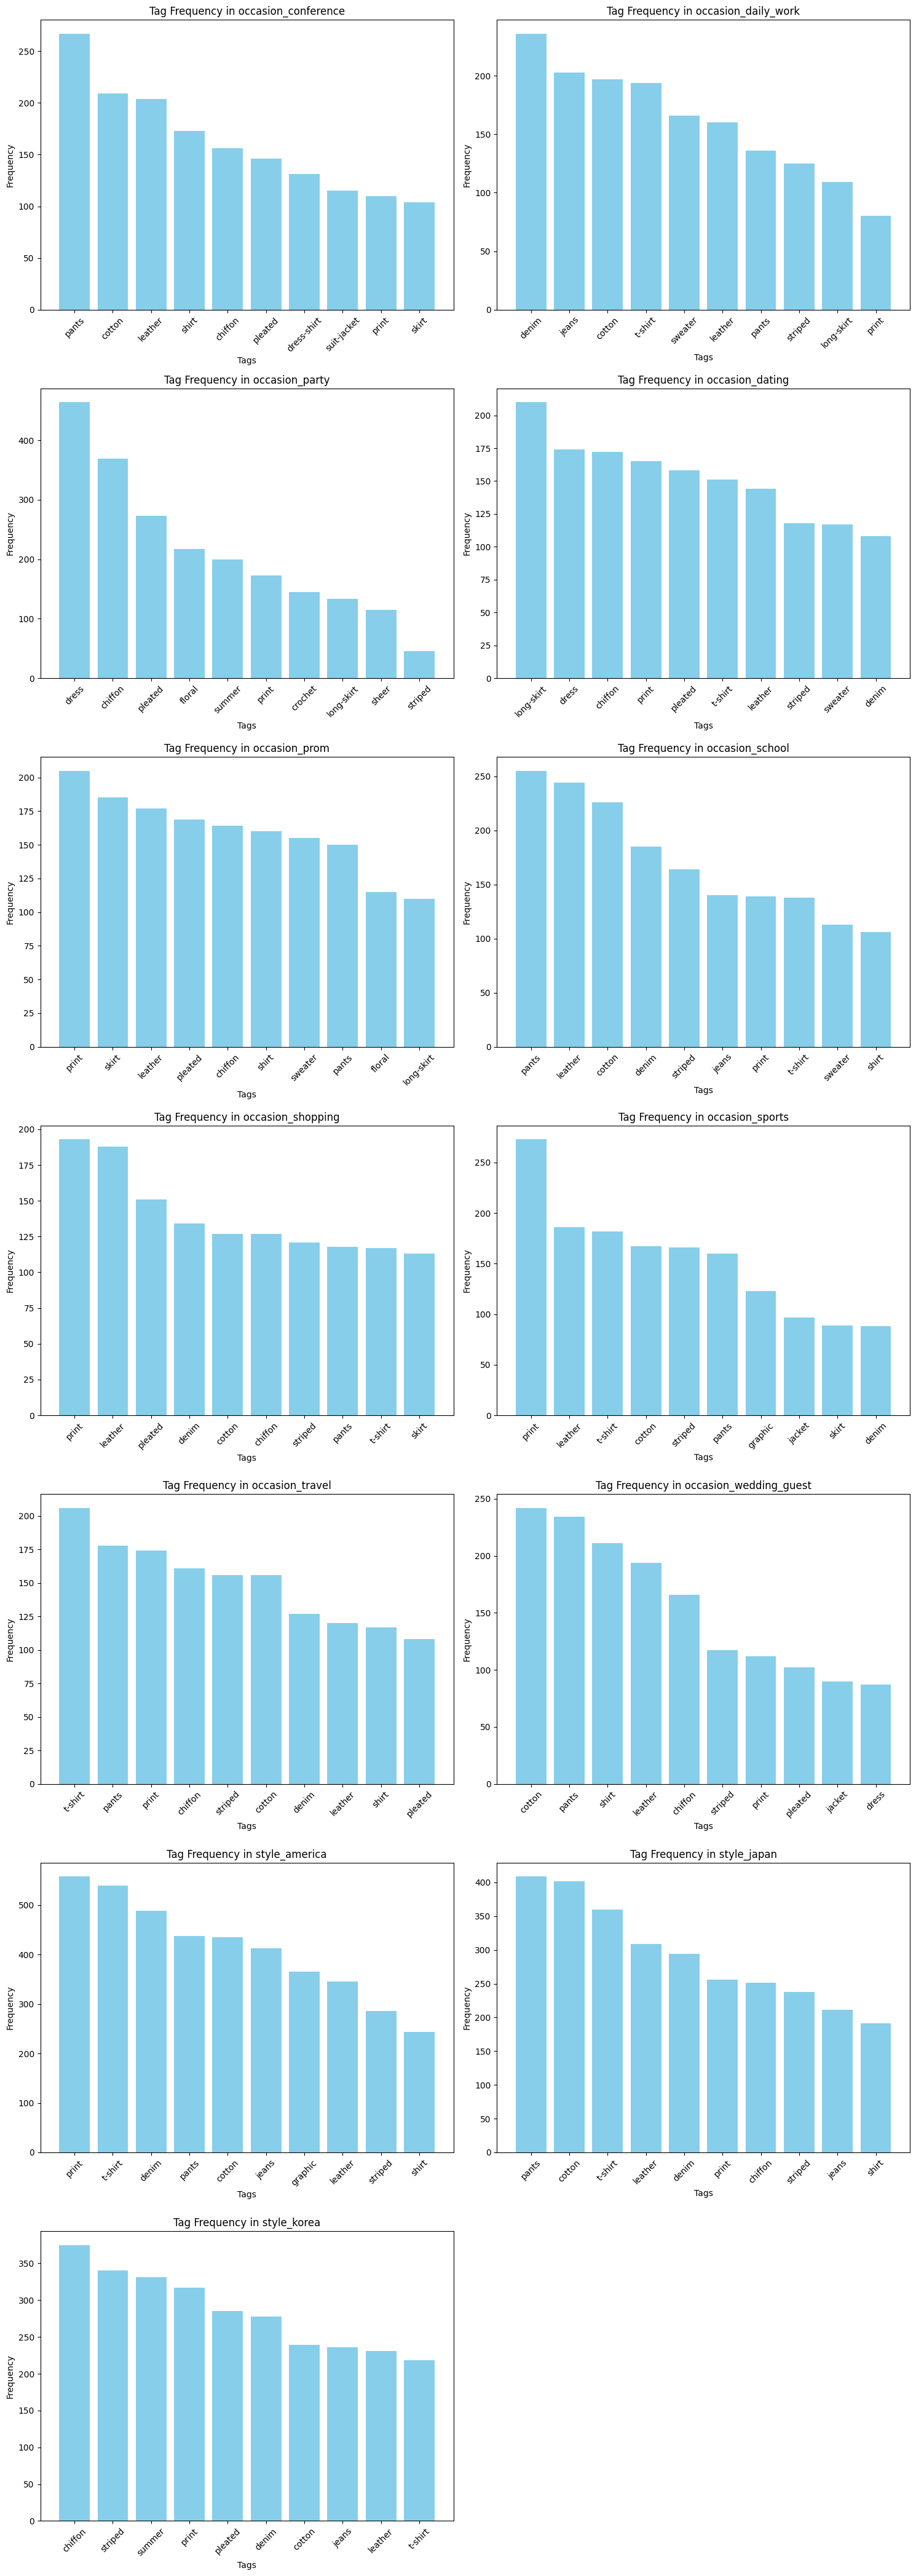

In [7]:
# Plotting in grid view
num_folders = len(folder_tag_counters)
cols = 2  # Number of columns in the grid
rows = (num_folders + cols - 1) // cols  # Calculate the number of rows needed

fig, axs = plt.subplots(rows, cols, figsize=(15, rows * 6))
axs = axs.flatten()

for ax, (folder, tag_counter) in zip(axs, folder_tag_counters.items()):
    sorted_tags = tag_counter.most_common()
    tags, frequencies = zip(*sorted_tags[:10])
    bars = ax.bar(tags, frequencies, color='skyblue')
    ax.set_xlabel('Tags')
    ax.set_ylabel('Frequency')
    ax.set_title(f'Tag Frequency in {folder}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-tick labels

# Remove empty subplots
for ax in axs[len(folder_tag_counters):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()